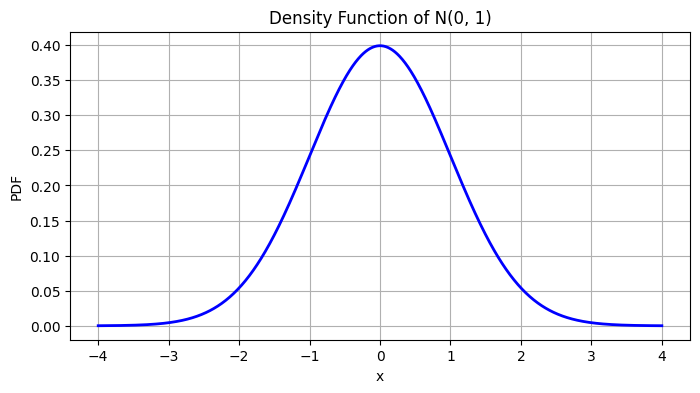

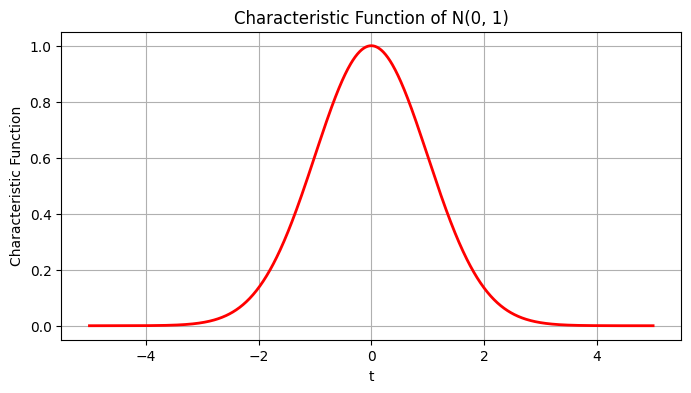

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

# Probability Density Function of N(0, 1)
def plot_pdf():
    x = np.linspace(-4, 4, 1000)
    y = norm.pdf(x, 0, 1)
    
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, 'b-', lw=2)
    plt.title('Density Function of N(0, 1)')
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.grid(True)
    plt.show()

plot_pdf()

# Characteristic Function of N(0, 1)
def char_func(t):
    return np.exp(-0.5 * t**2)

def plot_char_func():
    t = np.linspace(-5, 5, 1000)
    y = char_func(t)
    
    plt.figure(figsize=(8, 4))
    plt.plot(t, y.real, 'r-', lw=2)  # Plot the real part
    # For a standard normal distribution, the imaginary part is 0
    plt.title('Characteristic Function of N(0, 1)')
    plt.xlabel('t')
    plt.ylabel('Characteristic Function')
    plt.grid(True)
    plt.show()

plot_char_func()

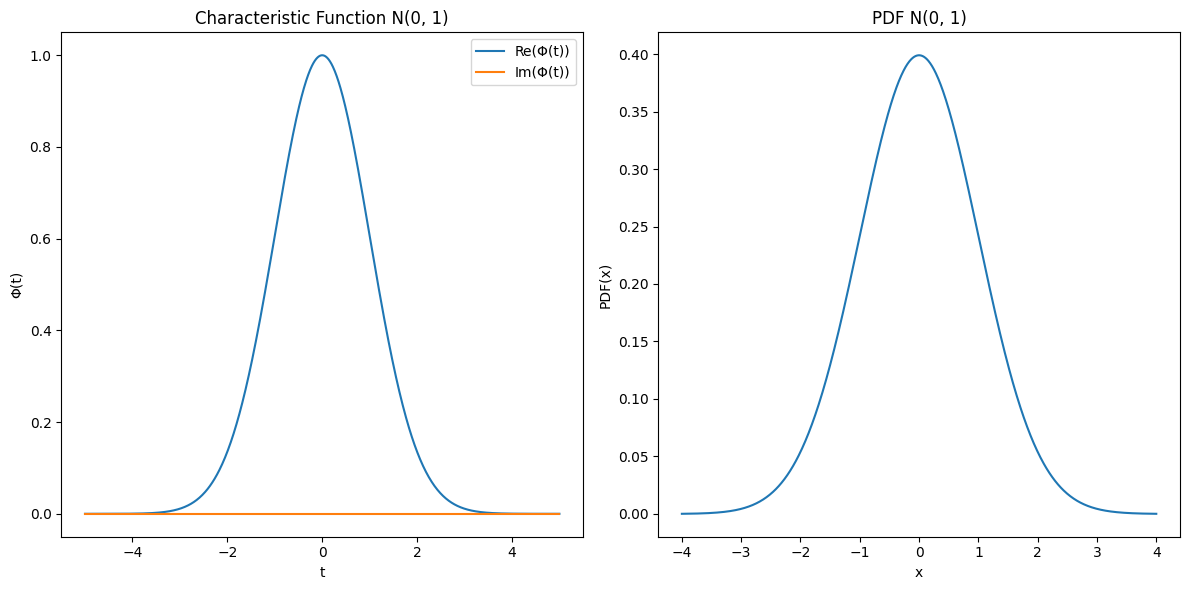

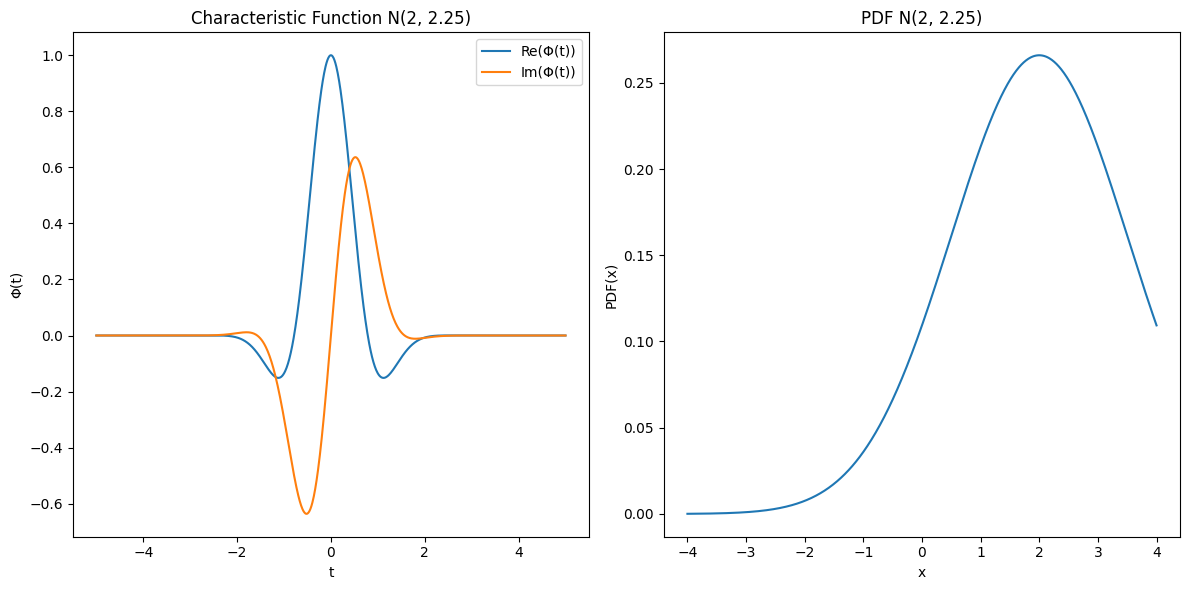

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import norm

def characteristic_function_normal(t, mu=0, sigma=1):
    """
    Characteristic function for the normal distribution N(μ, σ^2).
    """
    return np.exp(1j * mu * t - 0.5 * sigma**2 * t**2)

def inverse_fourier_pdf(char_func, x_range, mu=0, sigma=1):
    """
    Inverse Fourier transform to compute the probability density function (PDF)
    from the characteristic function.
    """
    pdf_values = np.zeros(len(x_range))
    
    for i, x in enumerate(x_range):
        # Define the integrand for the inverse Fourier transform
        integrand = lambda t: np.real(char_func(t, mu, sigma) * np.exp(-1j * t * x))
        # Compute the integral (inverse Fourier transform at point x)
        pdf_values[i] = (1 / (2 * np.pi)) * quad(integrand, -np.inf, np.inf)[0]
        
    return pdf_values

# Range of x values for plotting PDFs
x_range = np.linspace(-4, 4, 1000)

# Standard normal distribution (μ = 0, φ = 1)
mu_1, sigma_1 = 0, 1
pdf_1 = inverse_fourier_pdf(characteristic_function_normal, x_range, mu_1, sigma_1)

# General normal distribution (μ, φ^2)
mu_2, sigma_2 = 2, 1.5
pdf_2 = inverse_fourier_pdf(characteristic_function_normal, x_range, mu_2, sigma_2)

# Plot the characteristic function and PDF for the standard normal distribution
t_range = np.linspace(-5, 5, 1000)
char_func_values_1 = characteristic_function_normal(t_range, mu_1, sigma_1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t_range, char_func_values_1.real, label='Re(Φ(t))')
plt.plot(t_range, char_func_values_1.imag, label='Im(Φ(t))')
plt.title('Characteristic Function N(0, 1)')
plt.xlabel('t')
plt.ylabel('Φ(t)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_range, pdf_1)
plt.title('PDF N(0, 1)')
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.tight_layout()
plt.show()

# Plot the characteristic function and PDF for the general normal distribution
char_func_values_2 = characteristic_function_normal(t_range, mu_2, sigma_2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t_range, char_func_values_2.real, label='Re(Φ(t))')
plt.plot(t_range, char_func_values_2.imag, label='Im(Φ(t))')
plt.title(f'Characteristic Function N({mu_2}, {sigma_2**2})')
plt.xlabel('t')
plt.ylabel('Φ(t)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_range, pdf_2)
plt.title(f'PDF N({mu_2}, {sigma_2**2})')
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.tight_layout()
plt.show()

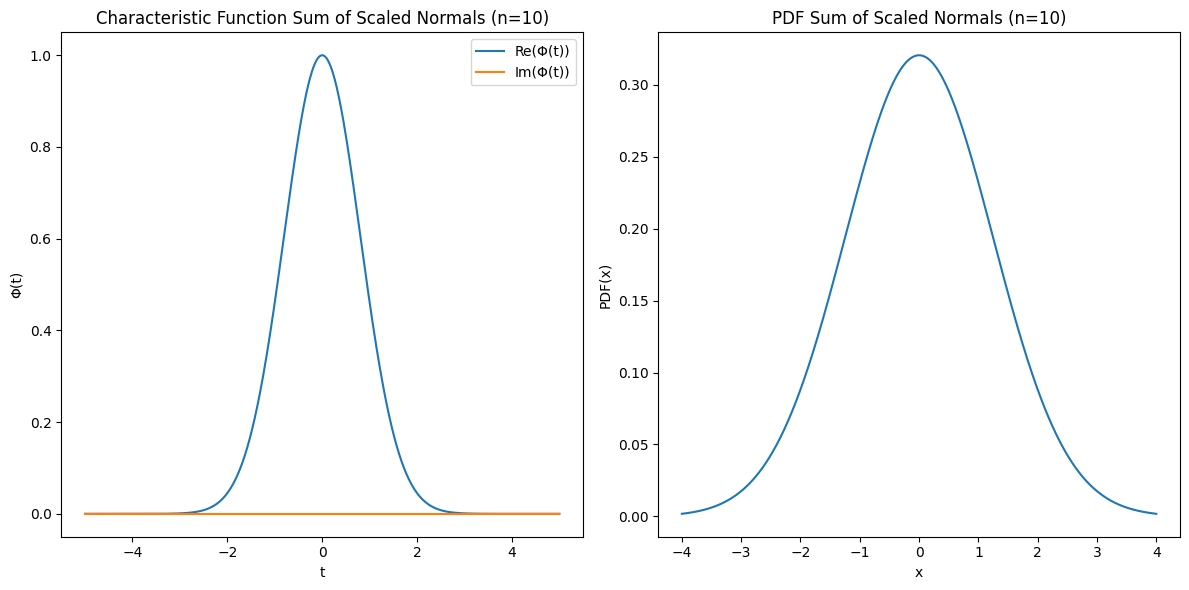

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import norm

def characteristic_function_scaled_sum(t, n):
    """
    Characteristic function for the sum of scaled independent standard normal variables.
    """
    sum_squares = np.sum([1/k**2 for k in range(1, n+1)])
    return np.exp(-0.5 * t**2 * sum_squares)

def inverse_fourier_pdf(char_func, x_range, n):
    """
    Inverse Fourier transform to compute the probability density function (PDF)
    from the characteristic function.
    """
    pdf_values = np.zeros(len(x_range))
    
    for i, x in enumerate(x_range):
        # Define the integrand for the inverse Fourier transform
        integrand = lambda t: np.real(char_func(t, n) * np.exp(-1j * t * x))
        # Compute the integral (inverse Fourier transform at point x)
        pdf_values[i] = (1 / (2 * np.pi)) * quad(integrand, -np.inf, np.inf)[0]
        
    return pdf_values

# Number of terms in the sum
n = 10  # for example, you can choose any n

# Range of x values for plotting PDFs
x_range = np.linspace(-4, 4, 1000)

# Compute PDF for the sum of scaled normal distributions
pdf_sum_scaled = inverse_fourier_pdf(characteristic_function_scaled_sum, x_range, n)

# Plot the characteristic function and PDF for the sum of scaled normal distributions
t_range = np.linspace(-5, 5, 1000)
char_func_values_sum_scaled = characteristic_function_scaled_sum(t_range, n)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t_range, char_func_values_sum_scaled.real, label='Re(Φ(t))')
plt.plot(t_range, char_func_values_sum_scaled.imag, label='Im(Φ(t))')
plt.title(f'Characteristic Function Sum of Scaled Normals (n={n})')
plt.xlabel('t')
plt.ylabel('Φ(t)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_range, pdf_sum_scaled)
plt.title(f'PDF Sum of Scaled Normals (n={n})')
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.tight_layout()
plt.show()